<a href="https://colab.research.google.com/github/Sanayaghimire/Data_Science/blob/main/Copy_of_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer #tokenization
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/bbc-text.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,category,text
1762,politics,mps quiz aides over royal income senior offici...
1833,business,us gives foreign firms extra time foreign firm...
1626,business,high fuel prices hit ba s profits british airw...
807,entertainment,films on war triumph at sundance a study of th...
475,entertainment,prince crowned top music earner prince earne...
...,...,...
181,tech,blogger grounded by her airline a us airline a...
1453,tech,broadband set to revolutionise tv bt is starti...
608,politics,probe launched on ken nazi jibe an investigati...
2013,business,trade gap narrows as exports rise the uk s tra...


In [ ]:
#No of a categories
len(set(df['category']))

5

In [ ]:
df.groupby('category').category.count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: category, dtype: int64

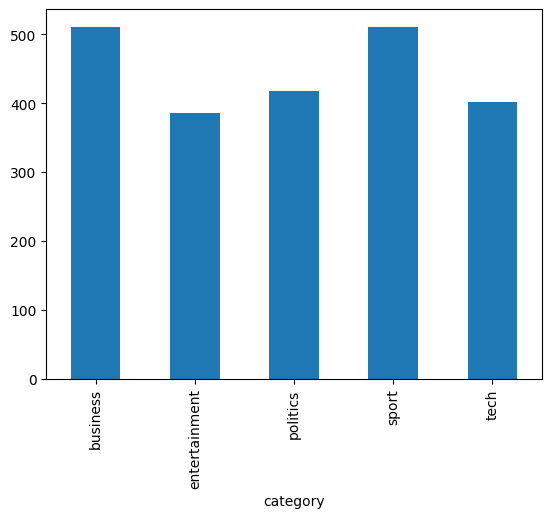

In [ ]:
#Analyzing data
df.groupby('category').category.count().plot.bar()
plt.show()

In [ ]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#stop words
nltk.download('stopwords')
words = stopwords.words("nepali")
print(words)

['छ', 'र', 'पनि', 'छन्', 'लागि', 'भएको', 'गरेको', 'भने', 'गर्न', 'गर्ने', 'हो', 'तथा', 'यो', 'रहेको', 'उनले', 'थियो', 'हुने', 'गरेका', 'थिए', 'गर्दै', 'तर', 'नै', 'को', 'मा', 'हुन्', 'भन्ने', 'हुन', 'गरी', 'त', 'हुन्छ', 'अब', 'के', 'रहेका', 'गरेर', 'छैन', 'दिए', 'भए', 'यस', 'ले', 'गर्नु', 'औं', 'सो', 'त्यो', 'कि', 'जुन', 'यी', 'का', 'गरि', 'ती', 'न', 'छु', 'छौं', 'लाई', 'नि', 'उप', 'अक्सर', 'आदि', 'कसरी', 'क्रमशः', 'चाले', 'अगाडी', 'अझै', 'अनुसार', 'अन्तर्गत', 'अन्य', 'अन्यत्र', 'अन्यथा', 'अरु', 'अरुलाई', 'अर्को', 'अर्थात', 'अर्थात्', 'अलग', 'आए', 'आजको', 'ओठ', 'आत्म', 'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो', 'आयो', 'उदाहरण', 'उनको', 'उहालाई', 'एउटै', 'एक', 'एकदम', 'कतै', 'कम से कम', 'कसै', 'कसैले', 'कहाँबाट', 'कहिलेकाहीं', 'का', 'किन', 'किनभने', 'कुनै', 'कुरा', 'कृपया', 'केही', 'कोही', 'गए', 'गरौं', 'गर्छ', 'गर्छु', 'गर्नुपर्छ', 'गयौ', 'गैर', 'चार', 'चाहनुहुन्छ', 'चाहन्छु', 'चाहिए', 'छू', 'जताततै', 'जब', 'जबकि', 'जसको', 'जसबाट', 'जसमा', 'जसलाई', 'जसले', 'जस्तै', 'जस्तो', 'जस्तोसुकै', 'जहाँ'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Data Cleaning using regex
regs = re.sub("[^a-zA-Z]", " ", df['text'][905]).lower() #character to character
regs

'bets off after big brother  leak  a bookmaker has stopped taking bets on celebrity big brother after claiming  sensitive information  about the channel   show had been leaked   william hill made the move after four people tried to place bets on friday s surprise double eviction   this is highly unlikely to have been an inspired guess   william hill spokesman rupert adams said  however  a big brother spokeswoman was  satisfied  that sensitive information about the show remained confidential   the bookmaker said its suspicions had been aroused by betting for the last two contestant evictions  when people were still trying to place large sums despite odds as short as       but william hill s  overwhelming evidence  came on friday when four unknown callers asked to place bets on the show s surprise double eviction   shortly afterwards model caprice and actor jeremy edwards left the show  mr adams believed someone had gained access to figures which revealed how viewers were voting  and was

In [ ]:
# Data Cleaning using stemmer works on word to word
#stremming le root word patta lagauxa then tei anusar word xutauxa
stemmer = PorterStemmer()
data = "I am loving computing".split()
print(data)
[stemmer.stem(i) for i in data]
# stemmer.stem("")

['I', 'am', 'loving', 'computing']


['i', 'am', 'love', 'comput']

In [ ]:
# Data Cleaning using stemmer works on word to word

stemmer = PorterStemmer()
data = "I am loving computing".split()
print(data)
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

['I', 'am', 'loving', 'computing']


'i am love comput'

In [ ]:
# Data Cleaning using stemmer works on word to word

stemmer = PorterStemmer()
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

'i am love comput'

In [ ]:
# stemmer = PorterStemmer()
# data = df['text'[0]].split()
# print(len(data))
# " ".join([stemmer.stem(i) for i in df['text'][0]])
# # stemmer.stem("")

In [ ]:
# Data Cleaning removing stopwords
words = stopwords.words("english")
print(words)
without_stop_words_of_a_news = " ".join([i for i in regs.lower().split() if i not in words])
without_stop_words_of_a_news

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

'bets big brother leak bookmaker stopped taking bets celebrity big brother claiming sensitive information channel show leaked william hill made move four people tried place bets friday surprise double eviction highly unlikely inspired guess william hill spokesman rupert adams said however big brother spokeswoman satisfied sensitive information show remained confidential bookmaker said suspicions aroused betting last two contestant evictions people still trying place large sums despite odds short william hill overwhelming evidence came friday four unknown callers asked place bets show surprise double eviction shortly afterwards model caprice actor jeremy edwards left show mr adams believed someone gained access figures revealed viewers voting using predict celebrity would evicted next think somebody somewhere got trying hard take us cleaners said bets taken mr adams believe anyone channel big brother producer endemol tried place queried bets added need look many people privy sensitive i

In [ ]:
regs = re.sub("[^a-zA-Z]", " ", df['text'][2154]).lower() #character to character
regs

'green reports shun supply chain nearly     more uk top     firms produced non financial reports on social and environment issues than last year   but of the     companies reporting      didn t examine their supply chains  says the annual directions survey  green groups say putting pressure on supply chains is a major way companies can reduce their environmental impact  the survey is published by corporate social responsibility firm context and branding firm salterbaxter   blake lee harwood  campaigns director at greenpeace in the uk  said   it s fairly meaningless to talk about your company s direction in terms of sustainability without having detailed knowledge of your supply chain   it s also important to get some kind of independent assessment of your reporting    less than a quarter of companies       get their corporate social responsibility  csr  reports independently verified to provide assurances they are accurate and complete  says the survey  to date there are no set standar

In [ ]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
#join le list ko element lai sentence ma covert garni kaam garxa
df['cleaned'] = list(map(lambda x: " ".join([i for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]),df['text']))
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))
df

,category,text,cleaned
1762,politics,mps quiz aides over royal income senior offici...,mp quiz aid royal incom senior offici two bodi...
1833,business,us gives foreign firms extra time foreign firm...,us give foreign firm extra time foreign firm g...
1626,business,high fuel prices hit ba s profits british airw...,high fuel price hit ba profit british airway b...
807,entertainment,films on war triumph at sundance a study of th...,film war triumph sundanc studi unit state war ...
475,entertainment,prince crowned top music earner prince earne...,princ crown top music earner princ earn pop st...
...,...,...,...
181,tech,blogger grounded by her airline a us airline a...,blogger ground airlin us airlin attend fight j...
1453,tech,broadband set to revolutionise tv bt is starti...,broadband set revolutionis tv bt start push te...
608,politics,probe launched on ken nazi jibe an investigati...,probe launch ken nazi jibe investig standard b...
2013,business,trade gap narrows as exports rise the uk s tra...,trade gap narrow export rise uk trade gap narr...


In [ ]:
# " ".join([stemmer.stem(i) for i in without_stop_words_of_a_news.lower().split()])

In [ ]:
# list(filter(lambda x: [stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words],df['text']))

In [ ]:
# #cleaning dataset
# nltk.download('stopwords')
# stemmer = PorterStemmer()
# words = stopwords.words("english")
# words.extend(['a','an','the'])
# df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x.lower()).split() if i not in words]).lower())
# # df['newcleaned'] = [(i for i in list(df['cleaned'])).split() if i not in words ]
# df

In [ ]:
df.to_csv('cleaned_news.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
# df

In [ ]:
# print(words)

In [ ]:
# words = stopwords.words("nepali")
# words

In [ ]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# df

In [ ]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['cleaned'] #dependent
Y = df['category'] #independent

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)), #how much value you want to take
                     ('clf', LogisticRegression(random_state=1))])

# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# pipeline = Pipeline([
#     ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
#     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM
# ])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

In [ ]:
print(X_test,y_test)

944     mourinho expect fight finish chelsea manag jos...
692     uk troop ivori coast standbi down street confi...
664     uk premier ring music produc behind lord ring ...
1313    ring fire hit co writer die merl kilgor co wri...
71      singapor growth singapor economi grew best per...
                              ...                        
490     gigg hand wale lead role ryan gigg captain wal...
729     mansfield leyton orient second half goal andi ...
1424    smith work scottish wonder worst kept secret s...
1818    warn woeful wi fi secur compani get wors keep ...
507     gm crunch talk fiat futur fiat meet car giant ...
Name: cleaned, Length: 334, dtype: object 944             sport
692          politics
664     entertainment
1313    entertainment
71           business
            ...      
490             sport
729             sport
1424            sport
1818             tech
507          business
Name: category, Length: 334, dtype: object


In [33]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_test_news_cat = model.predict(X_test)
predict_train_news_cat = model.predict(X_train)

print("Test accuracy = ", accuracy_score(y_test,predict_test_news_cat))
print("Train accuracy = ", accuracy_score(y_train,predict_train_news_cat))

print('\n')
# print(predict_news_cat)

Test accuracy =  0.9700598802395209
Train accuracy =  0.9894235854045479




In [34]:

# file = open('/content/news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)

predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Enter news = Pelé was simply “The King.” He embraced “the beautiful game” of soccer in his 1958 World Cup debut for Brazil and never really let go.  He won a record three World Cups and was widely regarded as one of his sport’s greatest players. His majestic and galvanizing presence set him among the most recognizable figures in the world.  Pelé died Thursday at 82. He had undergone treatment for colon cancer since 2021.  Pelé was among the game’s most prolific scorers and spent nearly two decades enchanting fans and dazzling opponents. His grace, athleticism and moves on soccer’s highest stage transfixed all. He orchestrated a fast, fluid style of play that revolutionized the sport — a flair that personified Brazilian elegance on the field.  He carried his country to soccer’s heights and became a global ambassador for his sport in a journey that began on the streets of Sao Paulo state, where he would kick a sock stuffed with newspapers or rags.  “Pelé changed everything. He transforme

               precision    recall  f1-score   support

     business       0.90      0.98      0.94        63
entertainment       1.00      0.98      0.99        50
     politics       0.97      0.93      0.95        61
        sport       0.99      1.00      0.99        91
         tech       1.00      0.94      0.97        69

     accuracy                           0.97       334
    macro avg       0.97      0.97      0.97       334
 weighted avg       0.97      0.97      0.97       334

[[62  0  1  0  0]
 [ 0 49  1  0  0]
 [ 4  0 57  0  0]
 [ 0  0  0 91  0]
 [ 3  0  0  1 65]]


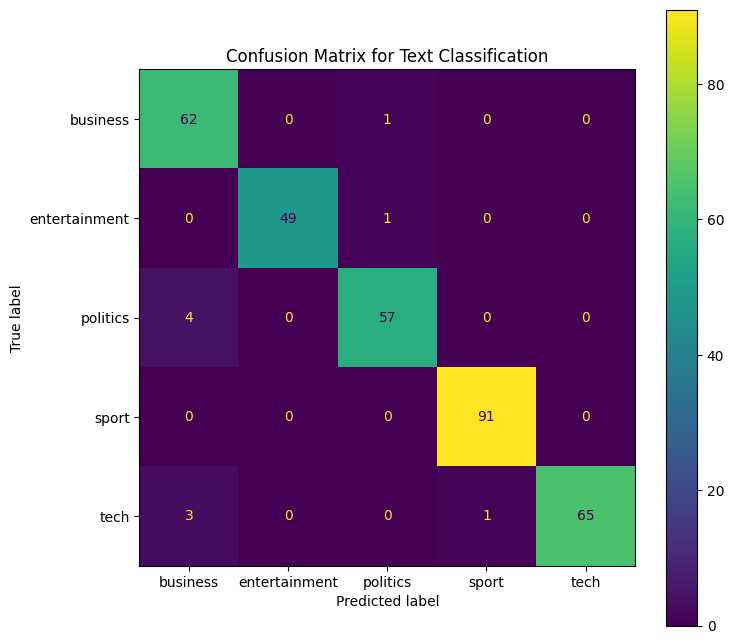

In [35]:
# confusion matrix and classification report(precision, recall, F1-score)
#confusion matrix is used to evaluate ur model
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(ytest,model.predict(X_test)))


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest,model.predict(X_test))
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for Text Classification')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);